In [126]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [127]:
data = pd.read_csv('cluster_27.csv')

In [128]:
data = data.drop(columns=['Unnamed: 0'])

In [129]:
data.head()

,ViolationCode,month_01,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,...,sba_209,sba_210,sba_211,sba_212,sba_213,sba_214,sba_215,sba_216,sba_217,sba_218
0,27-2005,0.074180,0.085977,0.090614,0.083492,0.083990,0.082010,0.083845,0.089853,0.091740,...,0.074222,0.016033,0.027746,0.026616,0.020938,0.060374,0.021986,0.083457,0.091141,0.019417
1,27-2006,0.068891,0.079405,0.087926,0.089376,0.080674,0.075780,0.079405,0.101704,0.097897,...,0.065446,0.018310,0.021574,0.031001,0.018492,0.041697,0.014322,0.096447,0.089376,0.014866
2,27-2007,0.065842,0.069524,0.080912,0.078628,0.085652,0.081935,0.086709,0.097927,0.108838,...,0.069729,0.013980,0.034029,0.032358,0.017014,0.058340,0.020254,0.088857,0.090153,0.011013
3,27-2010,0.047761,0.062426,0.099287,0.083036,0.085018,0.087990,0.107214,0.100476,0.115141,...,0.061038,0.013674,0.039239,0.034879,0.027547,0.058264,0.026159,0.113555,0.094927,0.021403
4,27-2011,0.046702,0.063917,0.097494,0.086586,0.083518,0.088631,0.108573,0.103119,0.116925,...,0.065280,0.014317,0.039714,0.036646,0.028294,0.055906,0.026760,0.112323,0.094256,0.019942


In [156]:
month_feature = data.iloc[:,1:13]
km = KMeans(n_clusters=2, random_state=5)
km.fit(month_feature)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [158]:
cluterResult = pd.DataFrame()

In [159]:
cluterResult['ViolationCode'] = data['ViolationCode']
cluterResult['MonthCluster'] = km.labels_
month_feature['Cluster_month'] = km.labels_

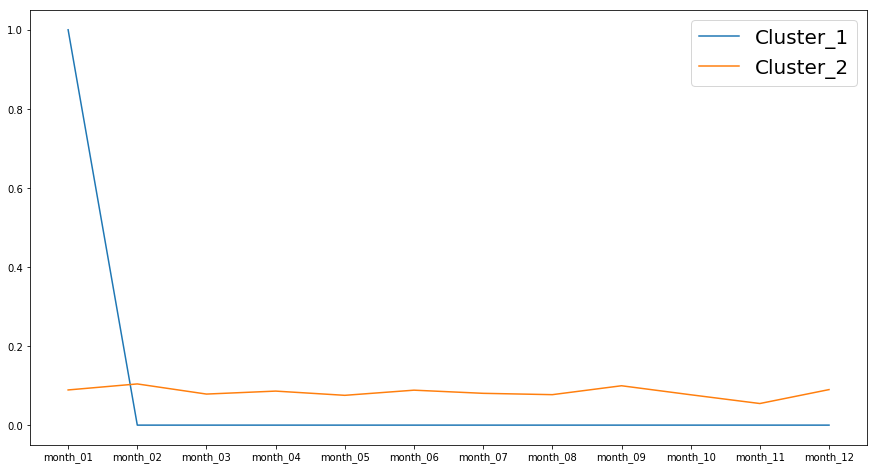

In [160]:
import matplotlib.pyplot as plt
cluster_mean = pd.DataFrame()
month_feature['label'] = km.labels_
cluster_mean['Cluster_1'] = month_feature.loc[month_feature['Cluster_month'] == 0].mean()
cluster_mean['Cluster_2'] = month_feature.loc[month_feature['Cluster_month'] == 1].mean()
#cluster_mean['Cluster_3'] = month_feature.loc[month_feature['Cluster_month'] == 2].mean()
cluster_mean.drop(['label'], inplace=True)
cluster_mean.drop(['Cluster_month'], inplace=True)
plt.figure(figsize=(15,8))
plt.plot(cluster_mean['Cluster_1'])
plt.plot(cluster_mean['Cluster_2'])
#plt.plot(cluster_mean['Cluster_3'])
plt.legend(fontsize=20)

In [134]:
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
range_n_clusters = range(2,7)

In [135]:
for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters, random_state=3)
    preds = clusterer.fit(month_feature).labels_
    centers = clusterer.cluster_centers_
    score = silhouette_score(month_feature, preds, metric='euclidean')
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(score))

For n_clusters = 2, the average silhouette_score is : 0.8108956366104658
For n_clusters = 3, the average silhouette_score is : 0.5938986838416848
For n_clusters = 4, the average silhouette_score is : 0.6434471535009253
For n_clusters = 5, the average silhouette_score is : 0.6243241881154364
For n_clusters = 6, the average silhouette_score is : 0.6625971550325158


In [136]:
sba_feature = data.iloc[:,13:]
km = KMeans(n_clusters=2, random_state=3)
km.fit(sba_feature)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=3, tol=0.0001, verbose=0)

In [137]:
cluterResult['sbaCluster'] = km.labels_
sba_feature['Cluster_sba'] = km.labels_

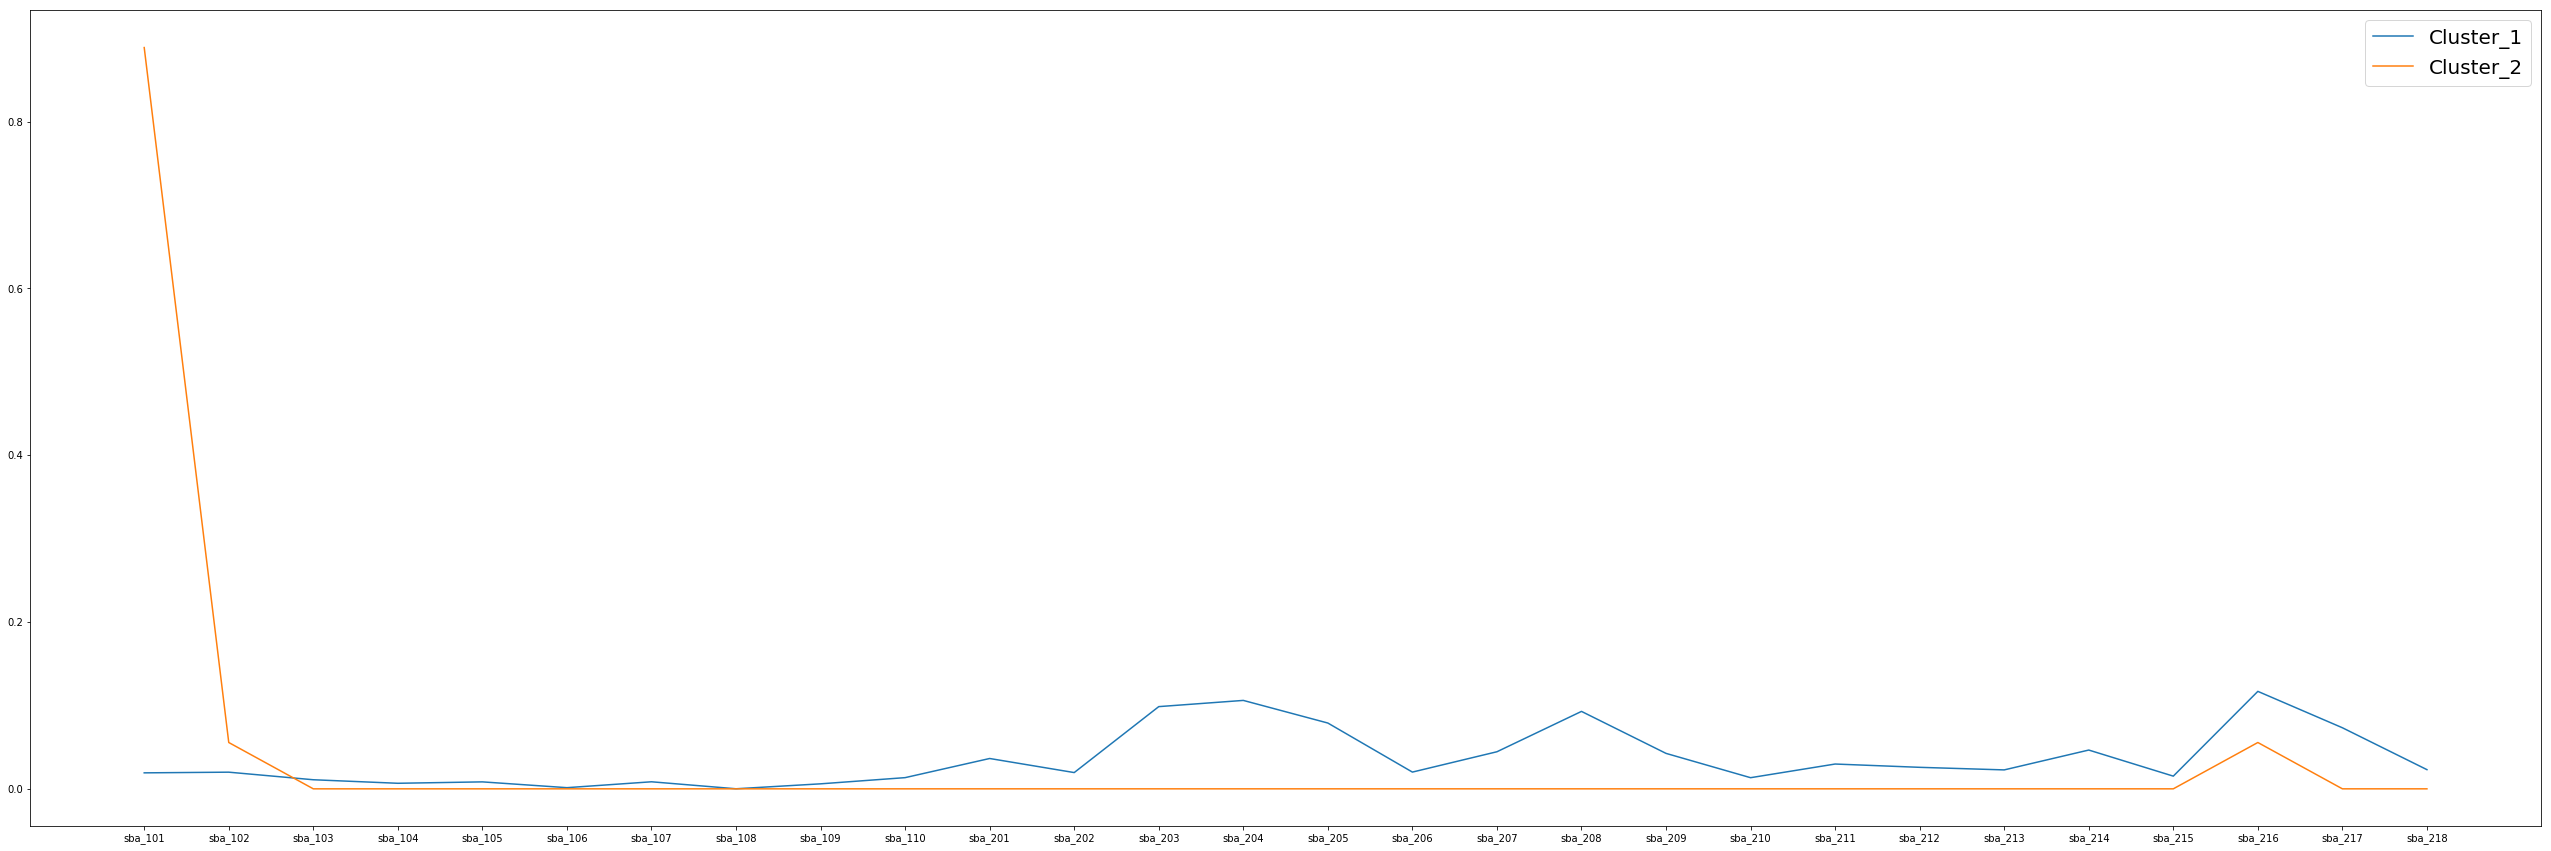

In [138]:
import matplotlib.pyplot as plt
cluster_mean2 = pd.DataFrame()
sba_feature['label'] = km.labels_
cluster_mean2['Cluster_1'] = sba_feature.loc[sba_feature['Cluster_sba'] == 0].mean()
cluster_mean2['Cluster_2'] = sba_feature.loc[sba_feature['Cluster_sba'] == 1].mean()
# cluster_mean2['Cluster_3'] = sba_feature.loc[sba_feature['Cluster_sba'] == 2].mean()

cluster_mean2.drop(['label'], inplace=True)
cluster_mean2.drop(['Cluster_sba'], inplace=True)

plt.figure(figsize=(45,15))
plt.plot(cluster_mean2['Cluster_1'])
plt.plot(cluster_mean2['Cluster_2'])
#plt.plot(cluster_mean2['Cluster_3'])
plt.legend(fontsize=20)

In [139]:
cluterResult.to_csv('cluster_result.csv')

In [140]:
for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters, random_state=3)
    preds = clusterer.fit(sba_feature).labels_
    centers = clusterer.cluster_centers_
    score = silhouette_score(sba_feature, preds, metric='euclidean')
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(score))

For n_clusters = 2, the average silhouette_score is : 0.7937750960967498
For n_clusters = 3, the average silhouette_score is : 0.691458289115894
For n_clusters = 4, the average silhouette_score is : 0.6094982041654229
For n_clusters = 5, the average silhouette_score is : 0.6689714495995426
For n_clusters = 6, the average silhouette_score is : 0.49042525386660707


In [141]:
cluterResult

,ViolationCode,MonthCluster,sbaCluster
0,27-2005,1,0
1,27-2006,1,0
2,27-2007,1,0
3,27-2010,1,0
4,27-2011,1,0
5,27-2012,1,0
6,27-2013,1,0
7,27-2014,1,0
8,27-2015,1,0
9,27-2017.3,1,0


In [121]:
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components = n_clusters, random_state=3)
    preds = clusterer.fit_predict(month_feature)
    centers = clusterer.means_
    score = silhouette_score (month_feature, preds, metric='euclidean')
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(score))


For n_clusters = 2, the average silhouette_score is : 0.8108956366104658
For n_clusters = 3, the average silhouette_score is : 0.5329233140147807
For n_clusters = 4, the average silhouette_score is : 0.557100504845673
For n_clusters = 5, the average silhouette_score is : 0.5701159502203741
For n_clusters = 6, the average silhouette_score is : 0.5841178795786013


In [122]:
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components = n_clusters, random_state=3)
    preds = clusterer.fit_predict(sba_feature)
    centers = clusterer.means_
    score = silhouette_score (sba_feature, preds, metric='euclidean')
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(score))


For n_clusters = 2, the average silhouette_score is : 0.765842121394108
For n_clusters = 3, the average silhouette_score is : 0.46401665276585646
For n_clusters = 4, the average silhouette_score is : 0.4658128512518997
For n_clusters = 5, the average silhouette_score is : 0.4209319945344335
For n_clusters = 6, the average silhouette_score is : 0.4506440489111818


In [186]:
data = pd.read_csv('cluster_27_10.csv')
data = data.drop(columns=['Unnamed: 0'])

In [187]:
month_feature = data.iloc[:,1:13]
km = KMeans(n_clusters=2, random_state=3)
km.fit(month_feature)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=3, tol=0.0001, verbose=0)

In [188]:
for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters, random_state=3)
    preds = clusterer.fit(month_feature).labels_
    centers = clusterer.cluster_centers_
    score = silhouette_score(month_feature, preds, metric='euclidean')
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(score))

For n_clusters = 2, the average silhouette_score is : 0.596674675073785
For n_clusters = 3, the average silhouette_score is : 0.5654049864244682
For n_clusters = 4, the average silhouette_score is : 0.5216270243200324
For n_clusters = 5, the average silhouette_score is : 0.3619566995354337
For n_clusters = 6, the average silhouette_score is : 0.38954898593918996


In [189]:
cluterResult3 = pd.DataFrame()
cluterResult3['ViolationCode'] = data['ViolationCode']
cluterResult3['MonthCluster'] = km.labels_
month_feature['Cluster_month'] = km.labels_

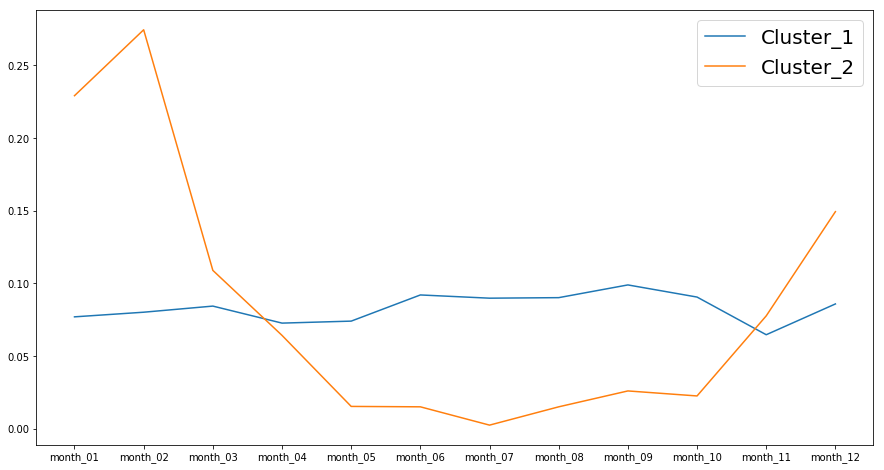

In [190]:
import matplotlib.pyplot as plt
cluster_mean = pd.DataFrame()
month_feature['label'] = km.labels_
cluster_mean['Cluster_1'] = month_feature.loc[month_feature['Cluster_month'] == 0].mean()
cluster_mean['Cluster_2'] = month_feature.loc[month_feature['Cluster_month'] == 1].mean()
#cluster_mean['Cluster_3'] = month_feature.loc[month_feature['Cluster_month'] == 2].mean()
cluster_mean.drop(['label'], inplace=True)
cluster_mean.drop(['Cluster_month'], inplace=True)
plt.figure(figsize=(15,8))
plt.plot(cluster_mean['Cluster_1'])
plt.plot(cluster_mean['Cluster_2'])
#plt.plot(cluster_mean['Cluster_3'])
plt.legend(fontsize=20)

In [191]:
from sklearn.cluster import KMeans
KM=KMeans(n_clusters=2,random_state=3)
scor=KM.fit_predict(month_feature)

In [192]:
res=pd.DataFrame(KM.transform(month_feature))
res=pd.concat((res,pd.DataFrame(KM.fit_predict(month_feature))),axis=1)
res.columns=list(range(2))+["cluster"]
res.loc[:,"score"]=res.apply(lambda x: x[int(x["cluster"])],axis=1)

#find the  five counties which have the longest distances
for i in res.sort_values("score",ascending=False)[:5].index:
    print(data.reset_index(drop=True)['ViolationCode'][i])

27-2153
27-2075
27-2059
27-2017.3
27-848


In [193]:
sba_feature = data.iloc[:,13:]
km = KMeans(n_clusters=2, random_state=3)
km.fit(sba_feature)
cluterResult3['sbaCluster'] = km.labels_
sba_feature['Cluster_sba'] = km.labels_
import matplotlib.pyplot as plt
cluster_mean2 = pd.DataFrame()
sba_feature['label'] = km.labels_
cluster_mean2['Cluster_1'] = sba_feature.loc[sba_feature['Cluster_sba'] == 0].mean()
cluster_mean2['Cluster_2'] = sba_feature.loc[sba_feature['Cluster_sba'] == 1].mean()
# cluster_mean2['Cluster_3'] = sba_feature.loc[sba_feature['Cluster_sba'] == 2].mean()

cluster_mean2.drop(['label'], inplace=True)
cluster_mean2.drop(['Cluster_sba'], inplace=True)

plt.figure(figsize=(45,15))
plt.plot(cluster_mean2['Cluster_1'])
plt.plot(cluster_mean2['Cluster_2'])
#plt.plot(cluster_mean2['Cluster_3'])
plt.legend(fontsize=20)

ValueError: Found array with 0 feature(s) (shape=(59, 0)) while a minimum of 1 is required.

In [170]:
for n_clusters in range_n_clusters:
    clusterer = GaussianMixture(n_components = n_clusters, random_state=3)
    preds = clusterer.fit_predict(sba_feature)
    centers = clusterer.means_
    score = silhouette_score (sba_feature, preds, metric='euclidean')
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(score))

For n_clusters = 2, the average silhouette_score is : 0.8753494723810982
For n_clusters = 3, the average silhouette_score is : 0.3327192046328396
For n_clusters = 4, the average silhouette_score is : 0.31715522608102864
For n_clusters = 5, the average silhouette_score is : 0.29324595660478725
For n_clusters = 6, the average silhouette_score is : 0.30941873301108447


In [171]:
cluterResult3.to_csv('cluster_result3.csv')

In [177]:
from sklearn.cluster import KMeans
KM=KMeans(n_clusters=2,random_state=3)
scor=KM.fit_predict(sba_feature)

In [178]:
res=pd.DataFrame(KM.transform(sba_feature))
res=pd.concat((res,pd.DataFrame(KM.fit_predict(sba_feature))),axis=1)
res.columns=list(range(2))+["cluster"]
res.loc[:,"score"]=res.apply(lambda x: x[int(x["cluster"])],axis=1)

#find the  five counties which have the longest distances
for i in res.sort_values("score",ascending=False)[:5].index:
    print(data.reset_index(drop=True)['ViolationCode'][i])

27-848
27-2065
27-2042
27-2044
27-2153


In [196]:
data2 = pd.read_csv('cluster_27_100.csv')
data2 = data2.drop(columns=['Unnamed: 0'])

In [197]:
month_feature = data2.iloc[:,1:13]
km = KMeans(n_clusters=2, random_state=3)
km.fit(month_feature)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=3, tol=0.0001, verbose=0)

In [198]:
for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters, random_state=3)
    preds = clusterer.fit(month_feature).labels_
    centers = clusterer.cluster_centers_
    score = silhouette_score(month_feature, preds, metric='euclidean')
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(score))

For n_clusters = 2, the average silhouette_score is : 0.7440389666948822
For n_clusters = 3, the average silhouette_score is : 0.26966894582947193
For n_clusters = 4, the average silhouette_score is : 0.2704074580267404
For n_clusters = 5, the average silhouette_score is : 0.4149163250546047
For n_clusters = 6, the average silhouette_score is : 0.30885603462859007


In [200]:
cluterResult4 = pd.DataFrame()
cluterResult4['ViolationCode'] = data2['ViolationCode']
cluterResult4['MonthCluster'] = km.labels_
month_feature['Cluster_month'] = km.labels_

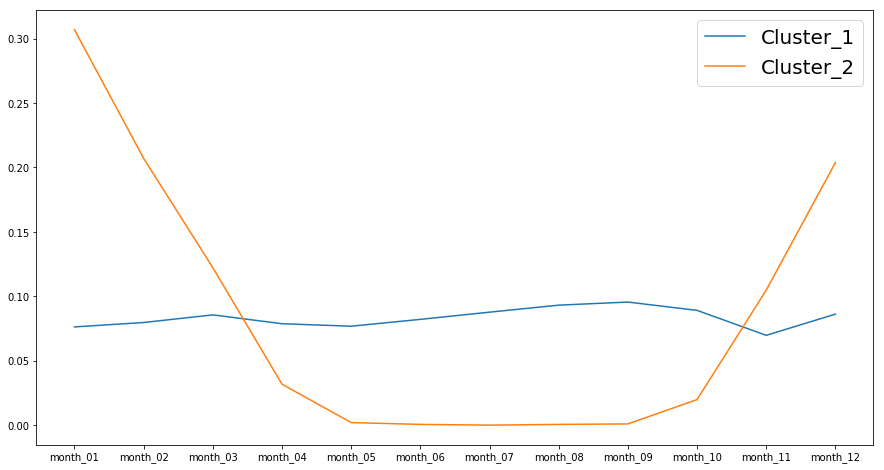

In [201]:
import matplotlib.pyplot as plt
cluster_mean = pd.DataFrame()
month_feature['label'] = km.labels_
cluster_mean['Cluster_1'] = month_feature.loc[month_feature['Cluster_month'] == 0].mean()
cluster_mean['Cluster_2'] = month_feature.loc[month_feature['Cluster_month'] == 1].mean()
#cluster_mean['Cluster_3'] = month_feature.loc[month_feature['Cluster_month'] == 2].mean()
cluster_mean.drop(['label'], inplace=True)
cluster_mean.drop(['Cluster_month'], inplace=True)
plt.figure(figsize=(15,8))
plt.plot(cluster_mean['Cluster_1'])
plt.plot(cluster_mean['Cluster_2'])
#plt.plot(cluster_mean['Cluster_3'])
plt.legend(fontsize=20)

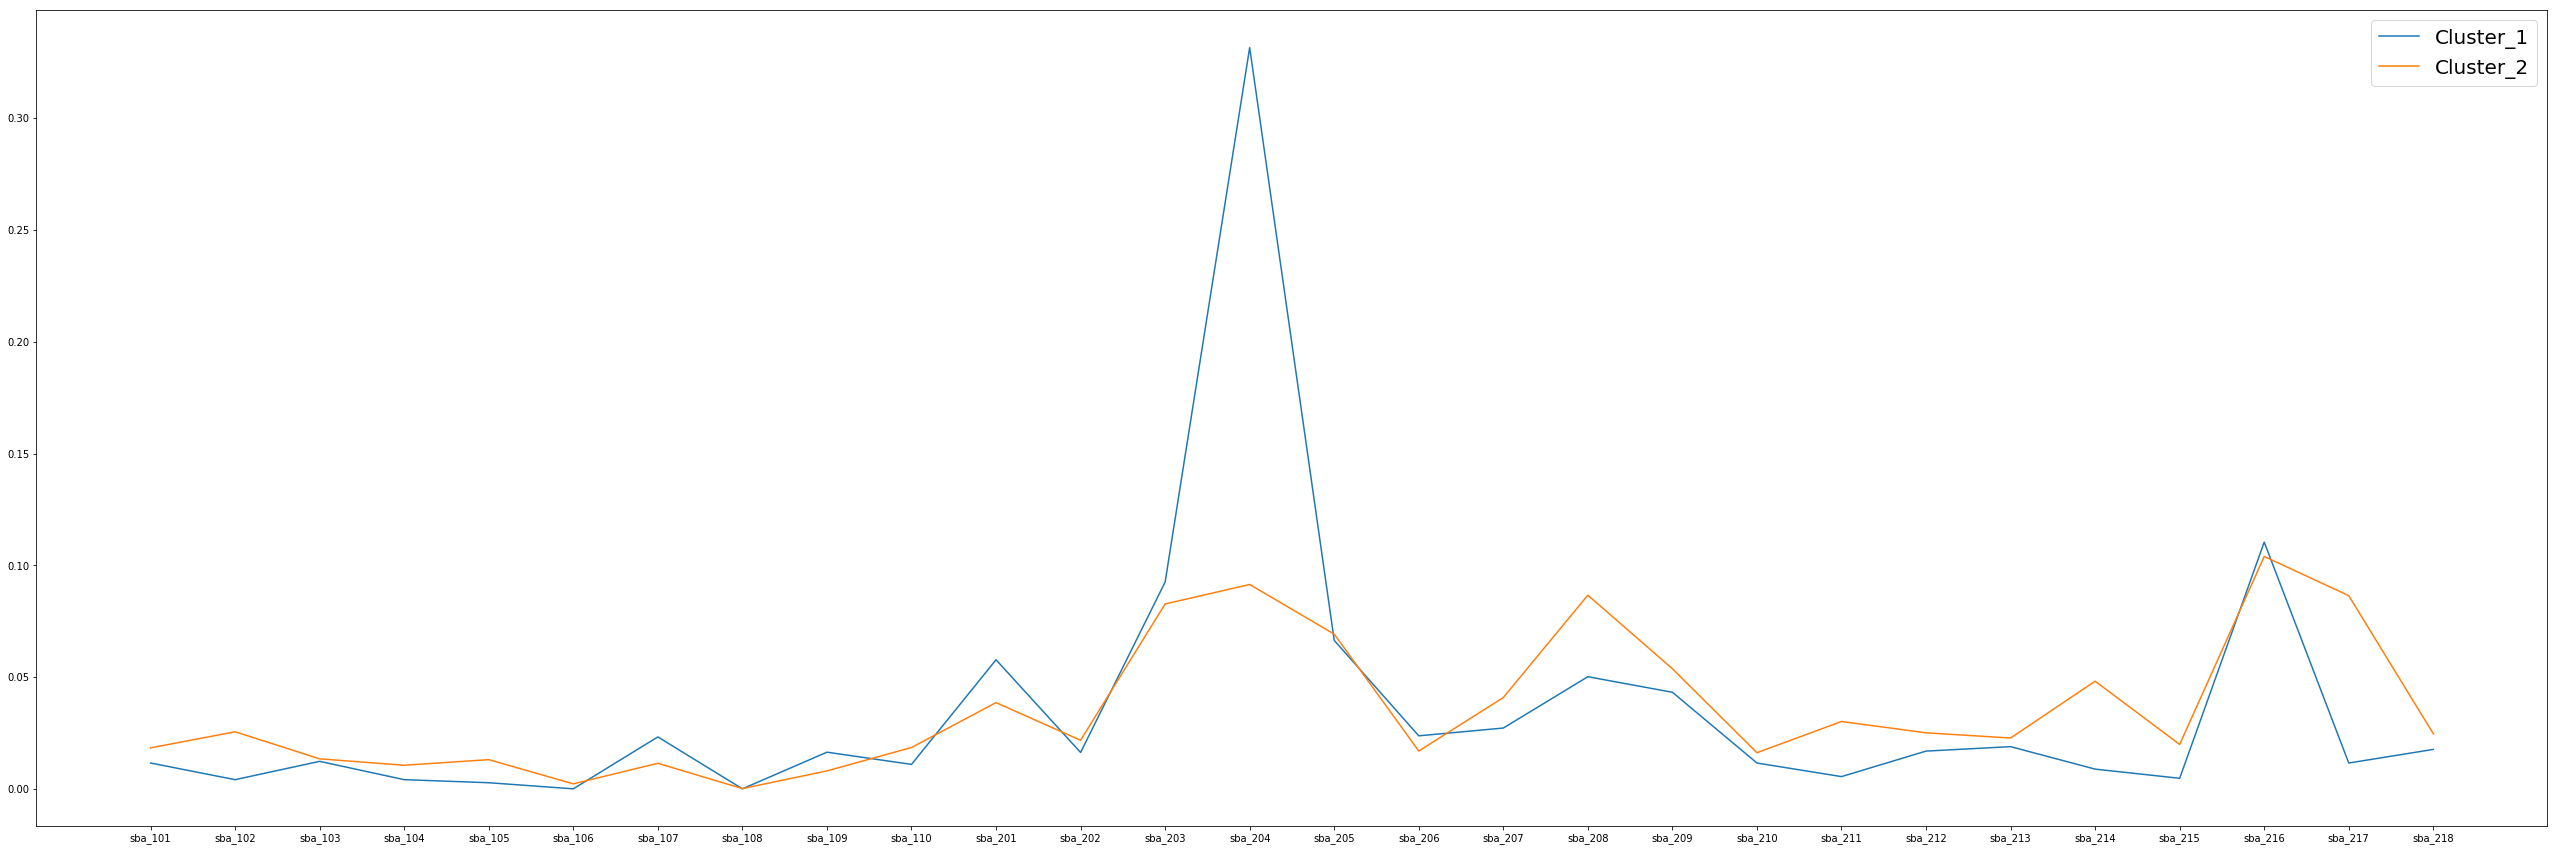

In [202]:
sba_feature = data2.iloc[:,13:]
km = KMeans(n_clusters=2, random_state=3)
km.fit(sba_feature)
cluterResult4['sbaCluster'] = km.labels_
sba_feature['Cluster_sba'] = km.labels_
import matplotlib.pyplot as plt
cluster_mean2 = pd.DataFrame()
sba_feature['label'] = km.labels_
cluster_mean2['Cluster_1'] = sba_feature.loc[sba_feature['Cluster_sba'] == 0].mean()
cluster_mean2['Cluster_2'] = sba_feature.loc[sba_feature['Cluster_sba'] == 1].mean()
# cluster_mean2['Cluster_3'] = sba_feature.loc[sba_feature['Cluster_sba'] == 2].mean()

cluster_mean2.drop(['label'], inplace=True)
cluster_mean2.drop(['Cluster_sba'], inplace=True)

plt.figure(figsize=(45,15))
plt.plot(cluster_mean2['Cluster_1'])
plt.plot(cluster_mean2['Cluster_2'])
#plt.plot(cluster_mean2['Cluster_3'])
plt.legend(fontsize=20)

In [203]:
cluterResult4.to_csv('cluster_result4.csv')